In [1]:
import numpy as np
import glob

In [2]:
path_opt = "results/n100_s3_recoptimized_estimate_maximize"
path_none = "results/n100_s3_recnone"

In [3]:
opt = []
for file in glob.glob(path_opt+"/*.npy"):
    arr = np.load(file)
    opt.append(arr)

In [4]:
none = []
for file in glob.glob(path_none+"/*.npy"):
    arr = np.load(file)
    none.append(arr)

In [5]:
w_opt = np.vstack(opt)
w_none = np.vstack(none)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
w_opt_mean = w_opt.mean(axis=0)
w_none_mean = w_none.mean(axis=0)
w_opt_p25 = np.percentile(w_opt, q=25, axis=0)
w_opt_p75 = np.percentile(w_opt, q=75, axis=0)
w_none_p25 = np.percentile(w_none, q=25, axis=0)
w_none_p75 = np.percentile(w_none, q=75, axis=0)

In [8]:
x_vals = np.arange(0, 10000, 1)
epsilon_vals = np.exp(-1*x_vals/(10000/8))

In [9]:
epsilon_vals

array([1.00000000e+00, 9.99200320e-01, 9.98401279e-01, ...,
       3.36268705e-04, 3.35999798e-04, 3.35731105e-04])

NameError: name 'w_opt_mean' is not defined

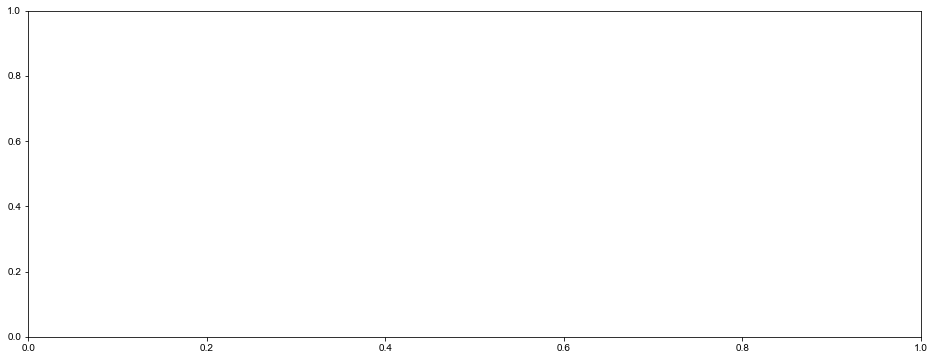

In [3]:
fig, ax = plt.subplots(figsize=(16,6))

sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
# sns.despine()

ax.plot(w_opt_mean, label="opt")
ax.plot(w_none_mean, label="none")

ax.fill_between(np.arange(0, 10000, 1), w_opt_p25, w_opt_p75, alpha=0.3)
ax.fill_between(np.arange(0, 10000, 1), w_none_p25, w_none_p75, alpha=0.3)

ax.set_xlim(0, 10000)
ax.set_ylim(-2, -1.5)
ax2 = ax.twiny()

# ax2.set_xlim(0, 1)
x_ticks = ax.get_xticks()
x_ticklabels = np.round(np.exp(-1*(x_ticks)/(10000/8)), decimals=3)
# ax2.set_xticks(x_ticks)
# ax2.set_xticklabels(x_ticklabels)
# ax2.set_xticks(np.linspace(ax2.get_xticks()[0], ax2.get_xticks()[-1], len(ax.get_xticks())))
# ax2.grid(None)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.2))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticklabels)
ax2.set_xlabel(r"exploration rate: $\epsilon$")

ax.set_xlabel("training step")
# ax2.set_xlabel("exploration rate")
ax.set_ylabel("social welfare")

ax.legend()
# plt.tight_layout()
plt.savefig("n100_s2_optimized_vs_none.pdf")

In [87]:
x_ticks

array([    0.,  2000.,  4000.,  6000.,  8000., 10000.])

In [78]:
ax.xaxis.get_ticks()

AttributeError: 'XAxis' object has no attribute 'get_ticks'

In [72]:
ax.get_xticklabels()

[Text(-2000.0, 0, '−2000'),
 Text(0.0, 0, '0'),
 Text(2000.0, 0, '2000'),
 Text(4000.0, 0, '4000'),
 Text(6000.0, 0, '6000'),
 Text(8000.0, 0, '8000'),
 Text(10000.0, 0, '10000'),
 Text(12000.0, 0, '12000')]

In [ ]:
ax2.set_xticks(np.linspace(ax2.get_xticks()[0], ax2.get_xticks()[-1], len(ax1.get_xticks())))

In [4]:
import pandas as pd

In [5]:
import pickle

In [48]:
with open("results/timeseries.pkl", "rb") as file:
    data = pickle.load(file)

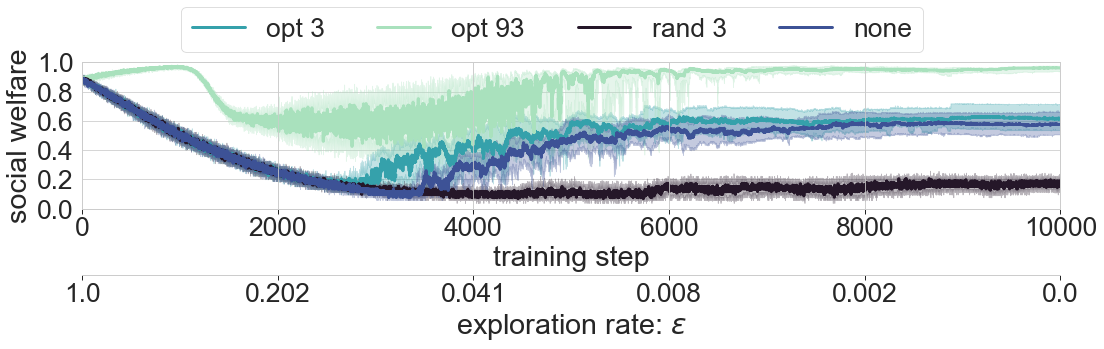

In [98]:
fig, ax = plt.subplots(figsize=(16,6))

cmap = plt.get_cmap('mako')
# sns.set_palette("magma")
colors = [cmap(c) for c in np.linspace(0.1, 0.9, 4)]
sns.set_context("paper", font_scale=3)
sns.set_style("whitegrid")

x_vals = np.arange(0, 10000, 1)
ax.plot(data[('optimized', '100', '3')]['median'], label="opt 3", ls="-", lw=3, c=colors[2])
ax.fill_between(x_vals, 
                data[('optimized', '100', '3')]['percentile25'], 
                data[('optimized', '100', '3')]['percentile75'], 
                alpha=0.3, color=colors[2])
ax.plot(data[('optimized', '100', '93')]['median'], label="opt 93", ls="-", lw=3, c=colors[3])
ax.fill_between(x_vals, 
                data[('optimized', '100', '93')]['percentile25'], 
                data[('optimized', '100', '93')]['percentile75'], 
                alpha=0.3, color=colors[3])
ax.plot(data[('random', '100', '3')]['median'], label="rand 3", ls="-", lw=3, c=colors[0])
ax.fill_between(x_vals, 
                data[('random', '100', '3')]['percentile25'], 
                data[('random', '100', '3')]['percentile75'], 
                alpha=0.3, color=colors[0])
ax.plot(data[('none', '100', '3')]['median'], label="none", ls="-", lw=3, c=colors[1])
ax.fill_between(x_vals, 
                data[('none', '100', '3')]['percentile25'], 
                data[('none', '100', '3')]['percentile75'], 
                alpha=0.3, color=colors[1])

ax.set_xlim(0, 10000)
ax.set_ylim(-2, -1.5)
ax2 = ax.twiny()

# ax2.set_xlim(0, 1)
x_ticks = ax.get_xticks()
x_ticklabels = np.round(np.exp(-1*(x_ticks)/(10000/8)), decimals=3)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.45))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticklabels)
ax2.set_xlabel(r"exploration rate: $\epsilon$")

ax.set_xlabel("training step")
# ax2.set_xlabel("exploration rate")
ax.set_ylabel("social welfare")

y_ticks = ax.get_yticks()
ax.set_yticks(y_ticks)
ax.set_yticklabels(["%.1f"%(i/(len(y_ticks)-1)) for i in range(len(y_ticks))])

fig.legend(bbox_to_anchor=(0.5, 0.9), loc='lower center', ncol=4)
plt.tight_layout()
plt.savefig("welfare_timeseries_comparison.png", bbox_inches='tight')

In [37]:
data[('random', '100', '3')]

{'mean': array([-1.56165  , -1.560685 , -1.5625125, ..., -1.91583  , -1.9165275,
        -1.9150275]),
 'percentile25': array([-1.598444  , -1.59442225, -1.61576875, ..., -1.97947375,
        -1.988189  , -1.9803805 ]),
 'percentile75': array([-1.598132  , -1.59346675, -1.61430625, ..., -1.97762125,
        -1.984367  , -1.9803415 ])}

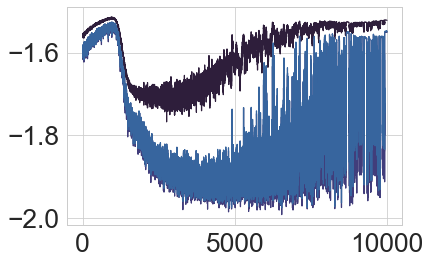

In [47]:
plt.plot(data[('optimized', '100', '93')]["mean"])
plt.plot(data[('optimized', '100', '93')]["percentile25"])
plt.plot(data[('optimized', '100', '93')]["percentile75"])